# Hand Written Digit Prediction

# Importing Libraries

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


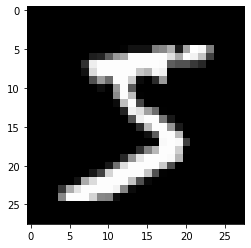

In [8]:
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

In [9]:
y_train[0]

5

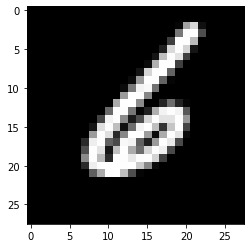

In [10]:
plt.imshow(x_train[999], cmap = 'gray')
plt.show()

In [11]:
y_train[999]

6

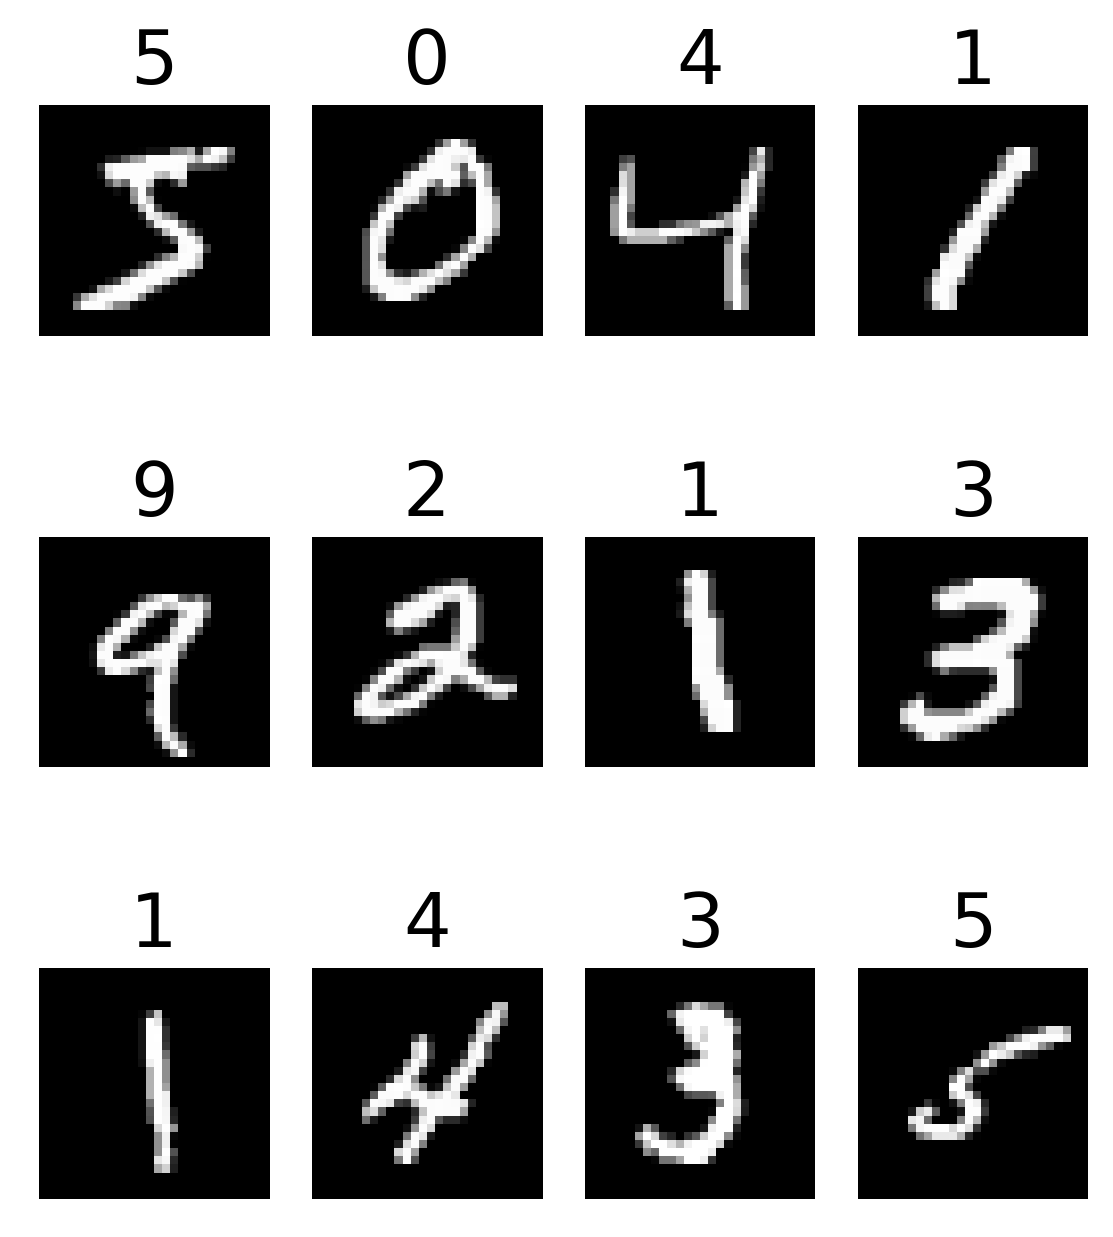

In [12]:
plt.figure(figsize = (5,6), dpi = 270)

for i in range(12):
    
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title('{}'.format(y_train[i]), fontsize = 20)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

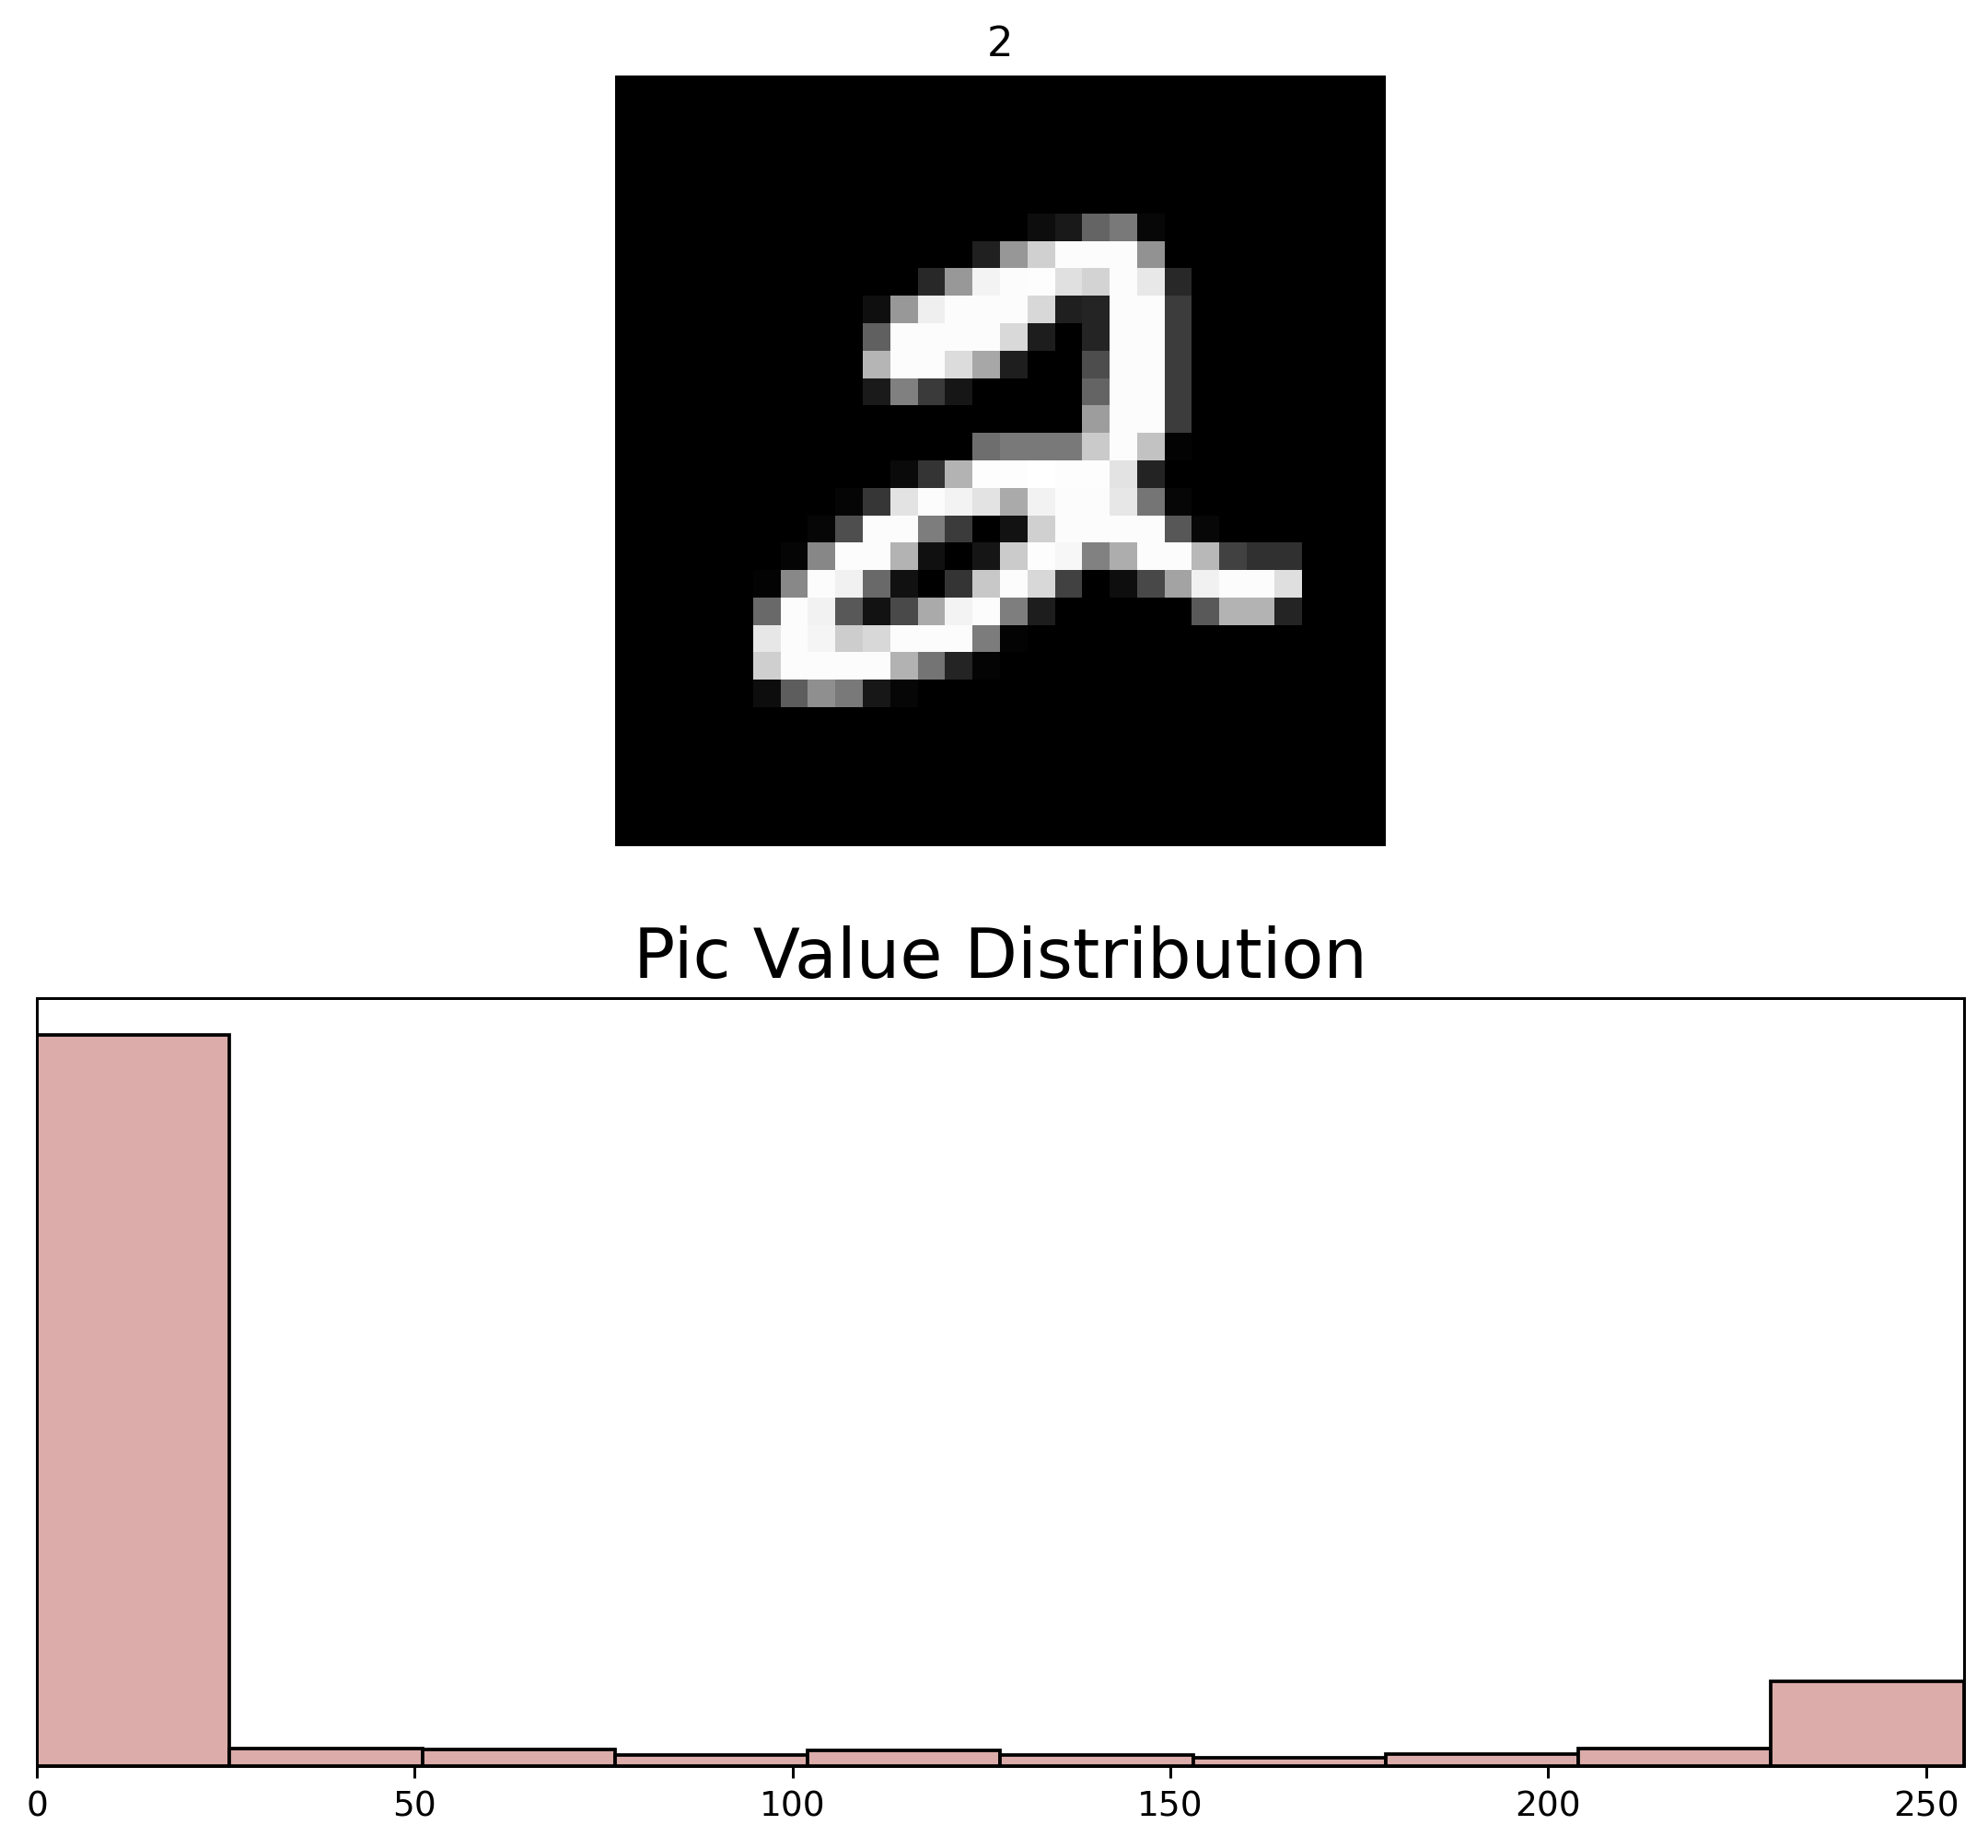

In [13]:
plt.figure(figsize = (10,9), dpi = 270)
plt.subplot(2,1,1)
plt.imshow(x_train[5], cmap = 'gray')
plt.title('{}'.format(y_train[5], fontsize = 20))
plt.xticks([])
plt.yticks([])

plt.subplot(2,1,2)
plt.hist(x_train[5].reshape(784), bins = 10, color = '#dbaca9', ec = 'black')
plt.title('Pic Value Distribution', fontsize = 20)
plt.xlim(0, 255)
plt.yticks([])

plt.show()

# Data Preprocessing

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [16]:
# Normalizing the data
x_train, x_test = x_train/255, x_test/255

In [17]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Model Building 

In [45]:
model = Sequential()

model.add(Dropout(0.2, seed = 42, input_shape = (784,), name = 'm3_drop_out_1'))
model.add(Dense(128, activation = 'relu', name = 'm3_hidden1'))
model.add(Dropout(0.2, seed = 42, name = 'm3_drop_out_2'))
model.add(Dense(64, activation = 'relu', name = 'm3_hidden2'))
model.add(Dense(15, activation = 'relu', name = 'm3_hidden3'))
model.add(Dense(10, activation='softmax', name='m3_output'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m3_drop_out_1 (Dropout)     (None, 784)               0         
                                                                 
 m3_hidden1 (Dense)          (None, 128)               100480    
                                                                 
 m3_drop_out_2 (Dropout)     (None, 128)               0         
                                                                 
 m3_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m3_hidden3 (Dense)          (None, 15)                975       
                                                                 
 m3_output (Dense)           (None, 10)                160       
                                                                 
Total params: 109,871
Trainable params: 109,871
Non-tr

In [47]:
history = model.fit(x_train, y_train, batch_size = 1000, epochs = 10, verbose = 1)
print(history.history.keys())

Epoch 1/10
60/60 [==============================] - 2s 22ms/step - loss: 1.1810 - accuracy: 0.6239
Epoch 2/10
60/60 [==============================] - 1s 21ms/step - loss: 0.4272 - accuracy: 0.8742
Epoch 3/10
60/60 [==============================] - 1s 22ms/step - loss: 0.3090 - accuracy: 0.9093
Epoch 4/10
60/60 [==============================] - 1s 19ms/step - loss: 0.2523 - accuracy: 0.9248
Epoch 5/10
60/60 [==============================] - 1s 20ms/step - loss: 0.2188 - accuracy: 0.9346
Epoch 6/10
60/60 [==============================] - 1s 20ms/step - loss: 0.1963 - accuracy: 0.9411
Epoch 7/10
60/60 [==============================] - 1s 21ms/step - loss: 0.1768 - accuracy: 0.9474
Epoch 8/10
60/60 [==============================] - 1s 20ms/step - loss: 0.1619 - accuracy: 0.9515
Epoch 9/10
60/60 [==============================] - 1s 20ms/step - loss: 0.1510 - accuracy: 0.9548
Epoch 10/10
60/60 [==============================] - 1s 21ms/step - loss: 0.1421 - accuracy: 0.9569
dict_keys

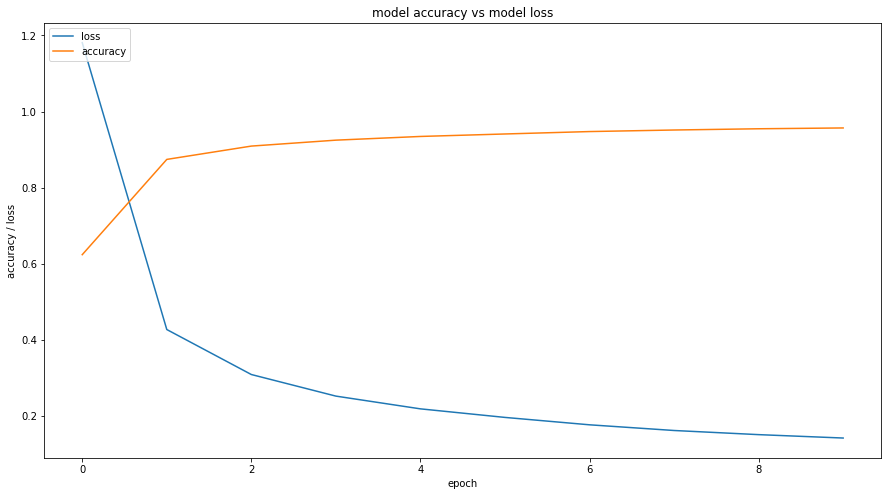

In [48]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy vs model loss')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

# Model Evaluation

In [50]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose = 1)

print('Test Loss', loss_and_metrics[0])
print('Test Accuracy', loss_and_metrics[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.1018 - accuracy: 0.9683
Test Loss 0.10178983211517334
Test Accuracy 0.9682999849319458


In [51]:
prediction = np.argmax(model.predict(x_test), axis = 1)
correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

313/313 [==============================] - 0s 1ms/step


In [52]:
type(prediction)

numpy.ndarray

In [53]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [54]:
prediction.shape

(10000,)

In [55]:
print(len(correct),'  :   classified correctly')
print(len(incorrect),'   : classified incorrectly')

9683   :   classified correctly
317    : classified incorrectly


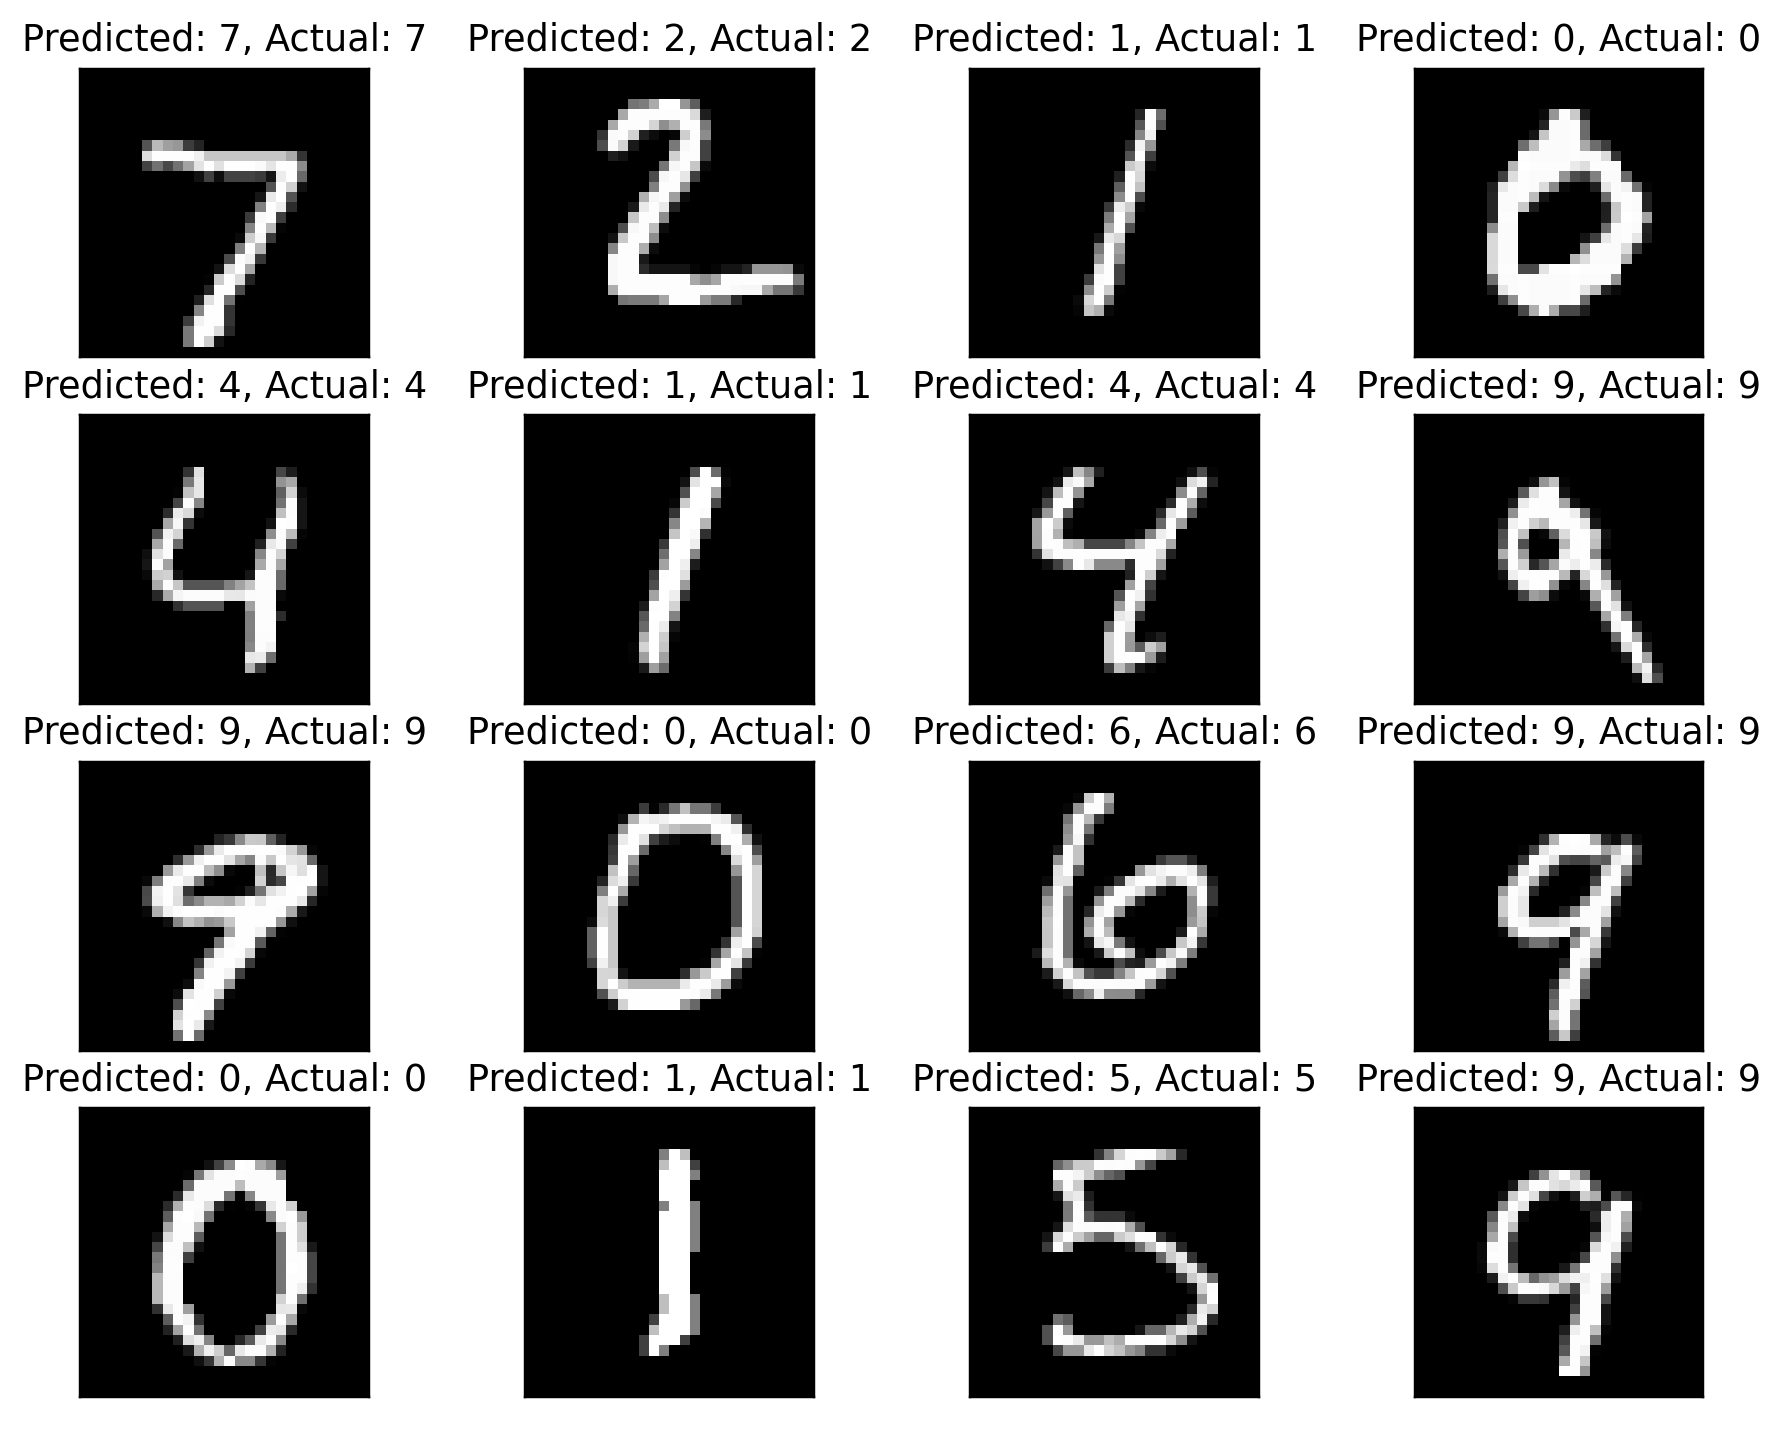

In [56]:
plt.figure(figsize =(10,8), dpi = 220)

for i, correct in enumerate(correct[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray')
    plt.title('Predicted: {}, Actual: {}'.format(prediction[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

plt.show()

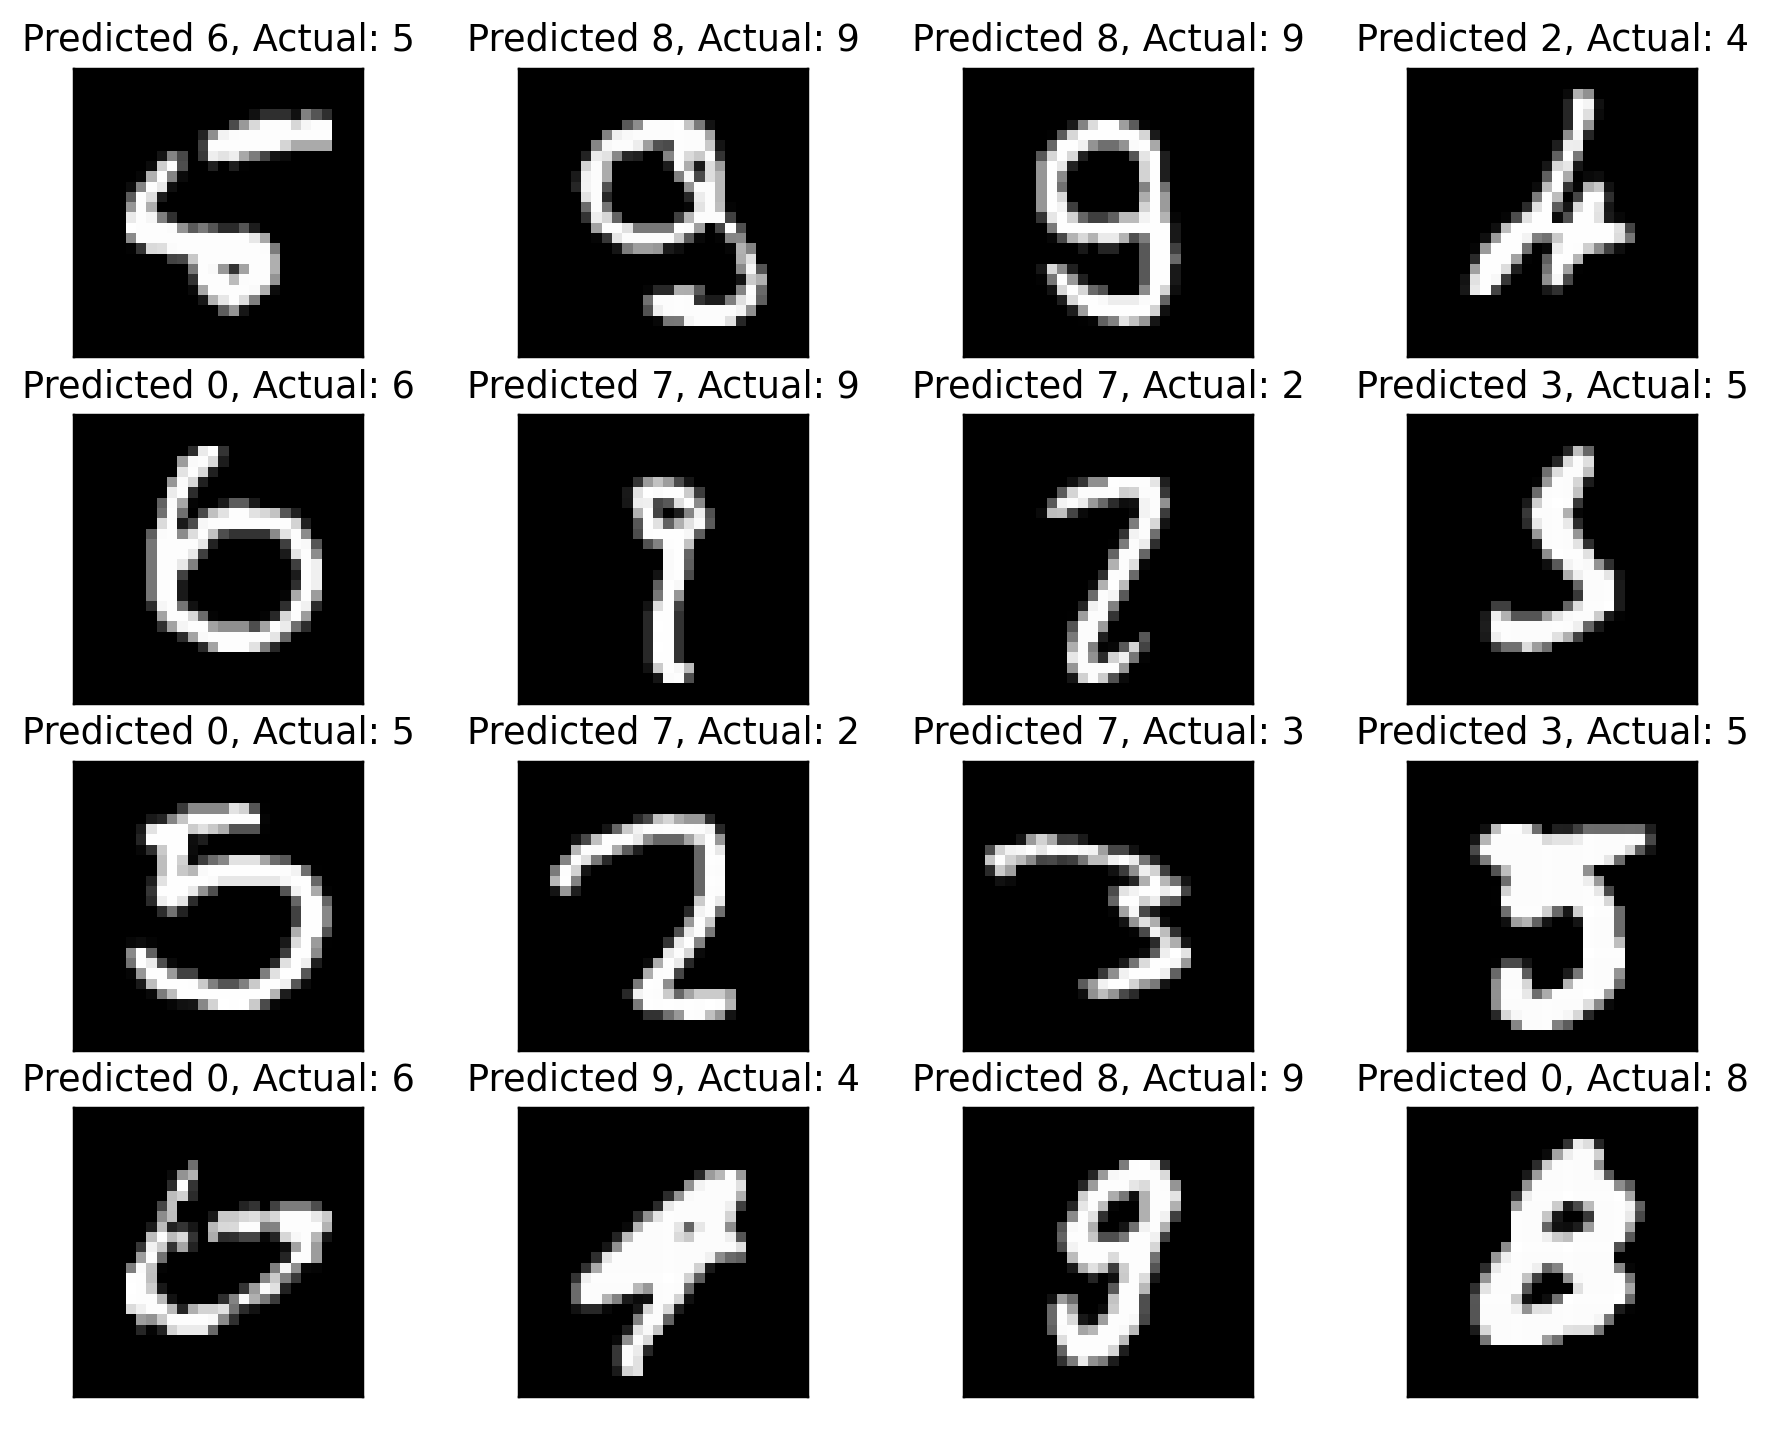

In [58]:
plt.figure(figsize =(10,8), dpi = 220)


for j, incorrect in enumerate(incorrect[:16]):
    plt.subplot(4,4,j+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray')
    plt.title('Predicted {}, Actual: {}'.format(prediction[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

In [59]:
from sklearn.metrics import confusion_matrix
import itertools
conf_matrix = confusion_matrix(y_true=y_test, y_pred=prediction)

In [60]:
conf_matrix

array([[ 968,    0,    2,    0,    0,    1,    4,    1,    4,    0],
       [   0, 1119,    4,    1,    0,    1,    4,    1,    5,    0],
       [   7,    1,  997,    4,    3,    1,    2,   10,    7,    0],
       [   0,    0,    9,  978,    0,    4,    0,    9,    6,    4],
       [   2,    0,    4,    0,  951,    0,    6,    2,    2,   15],
       [   6,    0,    1,   13,    1,  849,    8,    2,    7,    5],
       [   7,    3,    0,    1,    3,    4,  938,    0,    2,    0],
       [   2,    6,   19,    1,    1,    0,    0,  986,    0,   13],
       [   6,    0,    3,    8,    5,    4,    7,    5,  933,    3],
       [   5,    6,    1,   10,   12,    2,    0,    6,    3,  964]],
      dtype=int64)

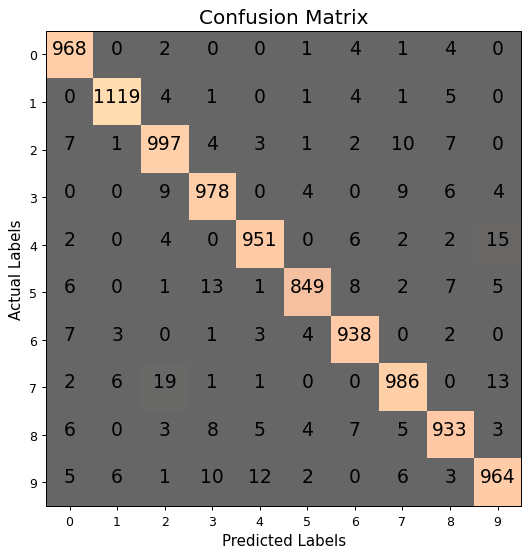

In [61]:
NR_CLASSES =10
LABEL_NAMES = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(7,7), dpi = 90)

plt.imshow(conf_matrix, cmap=plt.cm.copper, alpha = 0.6)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)



for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',color='black', fontsize = 15)

    

plt.show()

In [62]:
# True Positives
np.diag(conf_matrix)

array([ 968, 1119,  997,  978,  951,  849,  938,  986,  933,  964],
      dtype=int64)

In [63]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.9877551 , 0.98590308, 0.96608527, 0.96831683, 0.96843177,
       0.95179372, 0.97912317, 0.95914397, 0.95790554, 0.95540139])

In [64]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.96510469, 0.98590308, 0.95865385, 0.96259843, 0.97438525,
       0.98036952, 0.96800826, 0.96477495, 0.9628483 , 0.96015936])

In [65]:
avg_recall = np.mean(recall)
print(f'Model 1 recall score is {avg_recall:.2%}')

Model 1 recall score is 96.80%


In [66]:
avg_precision = np.mean(precision)
print(f'Model 1 precision score is {avg_precision:.2%}')

Model 1 precision score is 96.83%


In [67]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 1 f score is {f1_score:.2%}')

Model 1 f score is 96.81%


# Thank you